## Problem Statement

To compare the fuel consumption information of new and older models to find the most fuel-efficient vehicle.


Fuel Consumption datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions(CO2) for new light-duty vehicles for retail sale in Canada.
To compare vehicles from different model years, the fuel consumption ratings for 1995 to 2014 vehicles have been adjusted to reflect 5-cycle testing.

(P.S: Note that these are approximate values that were generated from the original ratings, not from vehicle testing.)

## Objectives:

1.Use scikit-learn to implement simple Linear Regression
2.Create a model, train it, test it and use the model

In [3]:
# Import Ncessary Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
df=pd.read_csv("my1995-2004-fuel-consumption-ratings-5-cycle.csv")
df

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,11.6,8.3,10.1,28,232,NaN,NaN
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,11.0,8.3,9.8,29,225,NaN,NaN
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,10.8,8.3,9.7,29,223,NaN,NaN
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,14.2,10.5,12.5,23,288,NaN,NaN
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,14.6,11.0,13.0,22,299,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,2004,Volvo,V70 R AWD Turbo,Station wagon: Mid-size,2.5,5,AS5,Z,14.8,10.2,12.7,22,292,NaN,NaN
7288,2004,Volvo,V70 R AWD Turbo,Station wagon: Mid-size,2.5,5,M6,Z,14.7,10.2,12.7,22,292,NaN,NaN
7289,2004,Volvo,XC70 AWD Turbo,Sport utility vehicle,2.5,5,AS5,Z,14.2,10.4,12.5,23,288,NaN,NaN
7290,2004,Volvo,XC90 2.5T AWD Turbo,Sport utility vehicle,2.5,5,AS5,Z,14.9,10.7,13.0,22,299,NaN,NaN


## Data Exploration

df.info()

In [8]:
df.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,0.0,0.0
mean,1999.628908,3.341909,5.834202,14.831596,10.783763,13.010532,22.897559,298.405376,NaN,NaN
std,3.001207,1.305494,1.616527,3.424207,2.596674,3.013485,5.477657,66.966156,NaN,NaN
min,1995.000000,1.000000,2.000000,4.900000,4.000000,4.500000,10.000000,104.000000,NaN,NaN
25%,1997.000000,2.300000,4.000000,12.500000,8.900000,11.000000,19.000000,253.000000,NaN,NaN
50%,2000.000000,3.000000,6.000000,14.400000,10.100000,12.500000,23.000000,288.000000,NaN,NaN
75%,2002.000000,4.300000,6.000000,17.000000,12.700000,15.000000,26.000000,345.000000,NaN,NaN
max,2004.000000,8.300000,12.000000,33.300000,20.600000,27.500000,63.000000,633.000000,NaN,NaN


In [9]:
df.isna().sum()

Model year                 0
Make                       0
Model                      0
Vehicle class              0
Engine size (L)            0
Cylinders                  0
Transmission               0
Fuel type                  0
City (L/100 km)            0
Highway (L/100 km)         0
Combined (L/100 km)        0
Combined (mpg)             0
CO2 emissions (g/km)       0
CO2 rating              7292
Smog rating             7292
dtype: int64

#### We see that dataset having two columns named "CO2 rating" & "Smog rating" contains %100 missing value.So,dropping these 2 column is a better idea.

In [11]:
df.drop(columns=['CO2 rating','Smog rating'],inplace=True)

In [12]:
df.columns

Index(['Model year', 'Make', 'Model', 'Vehicle class', 'Engine size (L)',
       'Cylinders', 'Transmission', 'Fuel type', 'City (L/100 km)',
       'Highway (L/100 km)', 'Combined (L/100 km)', 'Combined (mpg)',
       'CO2 emissions (g/km)'],
      dtype='object')

In [13]:
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,11.6,8.3,10.1,28,232
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,11.0,8.3,9.8,29,225
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,10.8,8.3,9.7,29,223
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,14.2,10.5,12.5,23,288
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,14.6,11.0,13.0,22,299


#### Since, we have to see how CO2 emission in different typr of car model. To do it we first make a list of most important columns.To do it let's see the correlation of these feature with CO2 emission.

In [15]:
numerical_col=[x for x in df.columns if df[x].dtype in ['int64','float64']]
numerical_col

['Model year',
 'Engine size (L)',
 'Cylinders',
 'City (L/100 km)',
 'Highway (L/100 km)',
 'Combined (L/100 km)',
 'Combined (mpg)',
 'CO2 emissions (g/km)']

In [16]:
corr=df[numerical_col].corr()
corr

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
Model year,1.000000,-0.001757,0.036281,0.014260,0.016729,0.015324,-0.016921,-0.016019
Engine size (L),-0.001757,1.000000,0.893024,0.862173,0.800008,0.848992,-0.799341,0.863789
Cylinders,0.036281,0.893024,1.000000,0.805141,0.711097,0.778888,-0.739695,0.788362
City (L/100 km),0.014260,0.862173,0.805141,1.000000,0.947340,0.992218,-0.937127,0.967493
Highway (L/100 km),0.016729,0.800008,0.711097,0.947340,1.000000,0.979671,-0.912726,0.954274
Combined (L/100 km),0.015324,0.848992,0.778888,0.992218,0.979671,1.000000,-0.939619,0.974702
Combined (mpg),-0.016921,-0.799341,-0.739695,-0.937127,-0.912726,-0.939619,1.000000,-0.926780
CO2 emissions (g/km),-0.016019,0.863789,0.788362,0.967493,0.954274,0.974702,-0.926780,1.000000


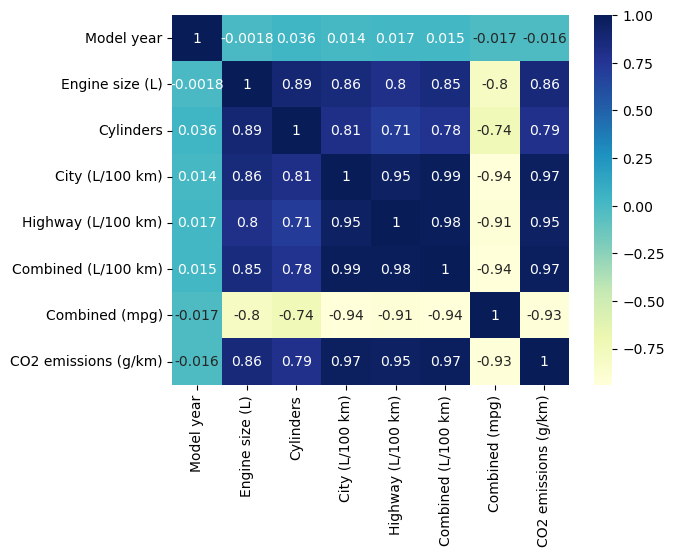

In [17]:
sns.heatmap(corr,annot=True, cmap='YlGnBu')
plt.show()

 ### Insights:

We see that the primary contributors to "CO2 emissions" appear to be engine size, cylinder count, and fuel consumption across city, highway, and combined driving scenarios.
Improved fuel efficiency (higher mpg) is associated with lower emissions.(Combined)

In terms of percentage contribution in CO2 Emissions (g/km):

CO2 emissions has a strong positive correlation with Engine size (L) (0.86), 
Cylinders (0.79), 
City (0.97), 
Highway (0.95), 
and Combined (0.97).

This indicates that larger engine sizes,higher cylinder counts,and higher fuel consumption in city, highway, and combined driving contribute significantly to higher CO2 emissions.

## Visualization

In [21]:
viz_col=df[['Engine size (L)',
 'Cylinders',
 'City (L/100 km)',
 'Highway (L/100 km)',
 'Combined (L/100 km)',
 'Combined (mpg)',
 'CO2 emissions (g/km)']]

<Figure size 2000x1000 with 0 Axes>

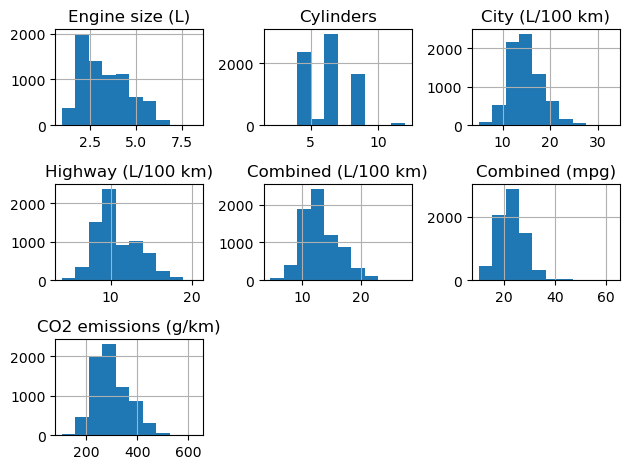

In [22]:
plt.figure(figsize=(20, 10))

viz_col.hist()

plt.tight_layout()
plt.show()

### Insights based on the distribution of each variable in the histogram plot:

1.)Engine size(L): The distribution is slightly right-skewed,indicating that smaller engine sizes are more common,while larger engines are less frequent.

2.)Cylinders: It shows discrete distribution,with a values like 4, 6, and 8 cylinders being more common.This is typical for vehicle engines, where manufacturers often use a limited set of cylinder options.

3.)City (L/100 km), Highway (L/100 km), and Combined (L/100 km): It show right-skewed distributions, with the majority of values towards the lower end, indicating that most vehicles have lower fuel consumption (in terms of L/100 km).

4.)Combined (mpg): This variable is left-skewed, with a majority of vehicles having higher miles per gallon (mpg) values. This is an inverse relationship to fuel consumption (L/100 km), as a higher mpg indicates lower fuel consumption.

5.)CO2 emissions (g/km): The distribution is approximately normal distribution(Gaussian-like),with most vehicles emitting a moderate level of CO2. However,there are some high-emission vehicles also present,resulting in a little right-skewed distribution.

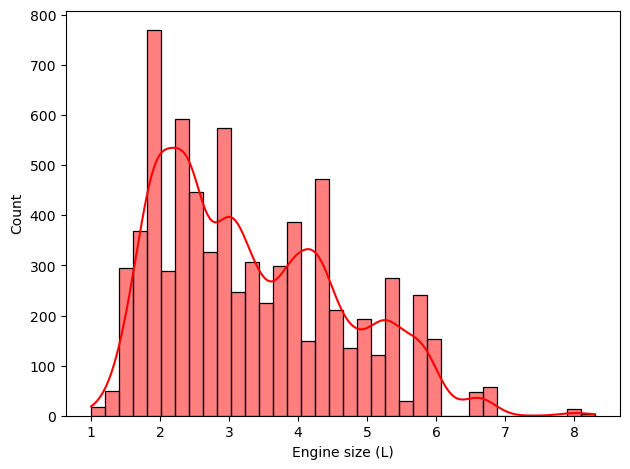

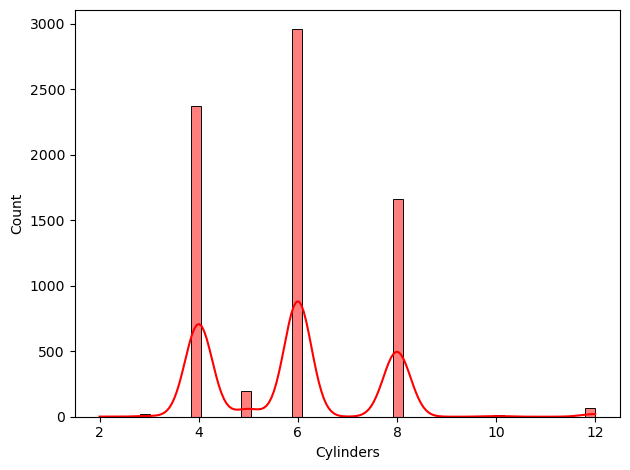

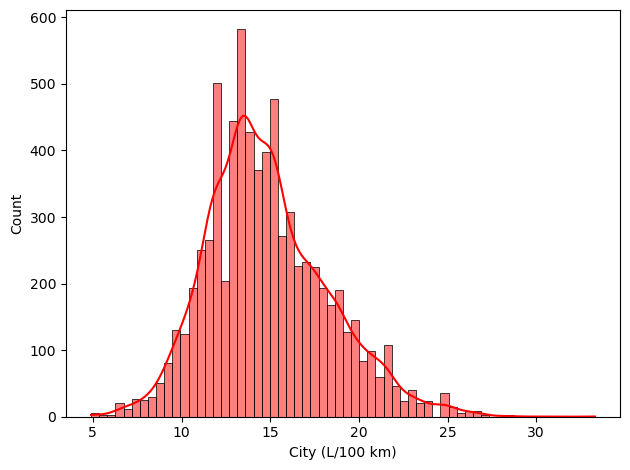

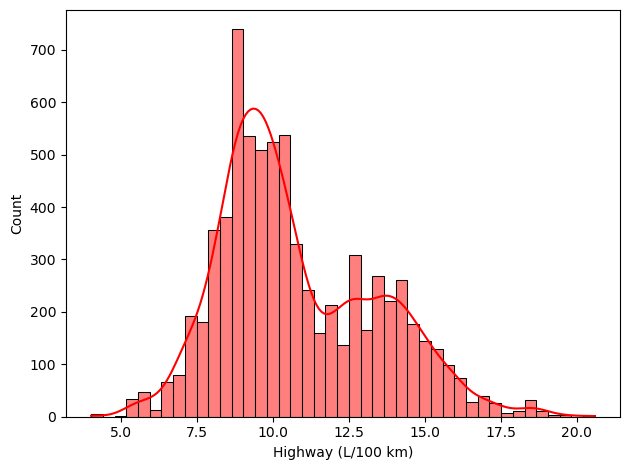

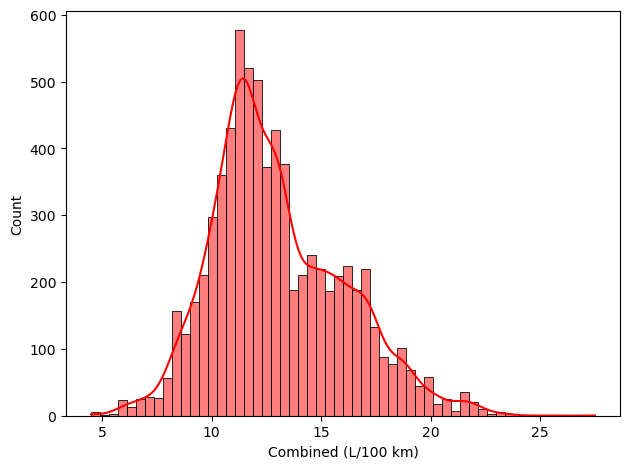

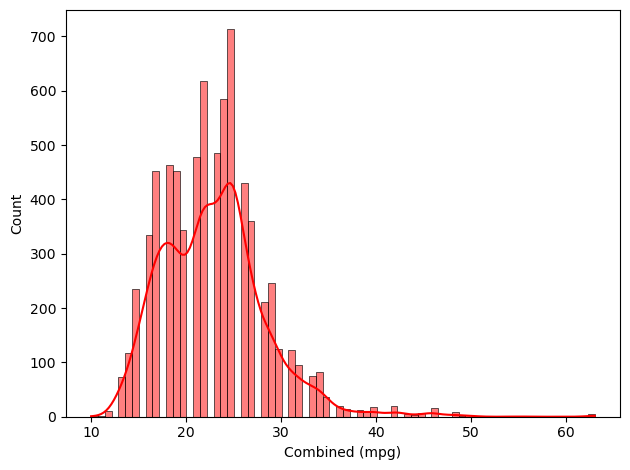

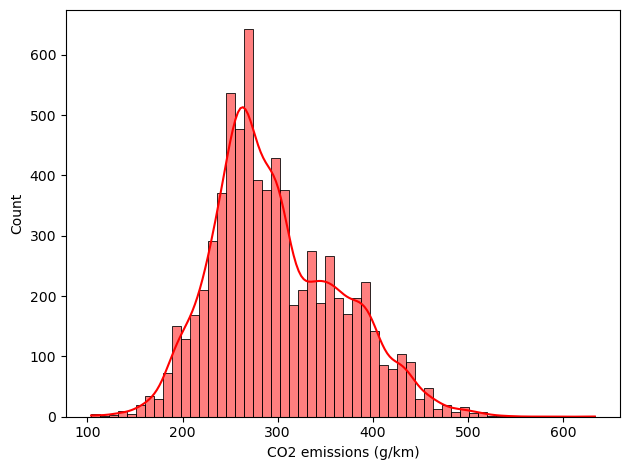

In [25]:
for i in viz_col:
    sns.histplot(df[i],kde=True,color='red')
    plt.tight_layout()
    plt.show()

In [26]:
cat_feature=[col for col in df.columns if df[col].dtype=='object']
cat_feature

['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type']

## Bivariate Analysis

In [28]:
numerical_col

['Model year',
 'Engine size (L)',
 'Cylinders',
 'City (L/100 km)',
 'Highway (L/100 km)',
 'Combined (L/100 km)',
 'Combined (mpg)',
 'CO2 emissions (g/km)']

Let's see how some independent variable separaely affects targe="CO2emission"...We'll apply Scatter Plot for this.

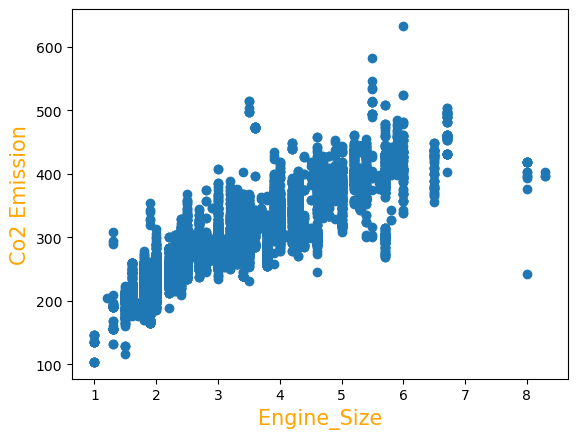

In [30]:
plt.scatter(df['Engine size (L)'],df['CO2 emissions (g/km)'])
plt.xlabel('Engine_Size',color='orange',fontsize=15)
plt.ylabel('Co2 Emission',color='orange',fontsize='15')
plt.show()

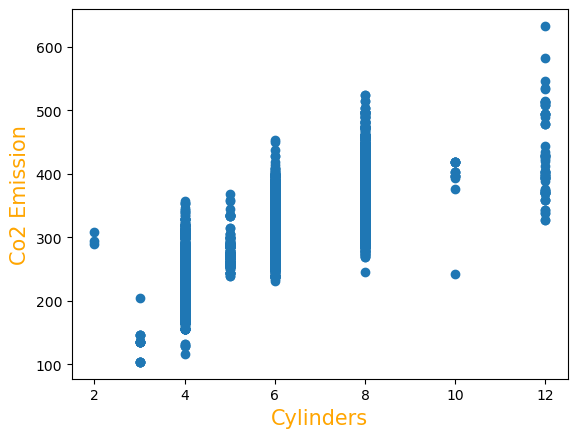

In [31]:
plt.scatter(df['Cylinders'],df['CO2 emissions (g/km)'])
plt.xlabel('Cylinders',color='orange',fontsize=15)
plt.ylabel('Co2 Emission',color='orange',fontsize='15')
plt.show()

## Data Preprocessing

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
# Data Cleaning

In [35]:
df.head(2)

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,11.6,8.3,10.1,28,232
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,11.0,8.3,9.8,29,225


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            7292 non-null   int64  
 1   Make                  7292 non-null   object 
 2   Model                 7292 non-null   object 
 3   Vehicle class         7292 non-null   object 
 4   Engine size (L)       7292 non-null   float64
 5   Cylinders             7292 non-null   int64  
 6   Transmission          7292 non-null   object 
 7   Fuel type             7292 non-null   object 
 8   City (L/100 km)       7292 non-null   float64
 9   Highway (L/100 km)    7292 non-null   float64
 10  Combined (L/100 km)   7292 non-null   float64
 11  Combined (mpg)        7292 non-null   int64  
 12  CO2 emissions (g/km)  7292 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 740.7+ KB


Dataset doesn't contain any kind of anamolies.

## Data Preparation
### Label Encoding

In [39]:
df_1=df.copy()

 I am using Label encoding year to reduce space complexities.

In [41]:
cat_feature

['Make', 'Model', 'Vehicle class', 'Transmission', 'Fuel type']

In [42]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

In [43]:
for col in cat_feature:
    df_1[col]=label_encoder.fit_transform(df_1[col])

In [44]:
df_1.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km)
0,1995,0,645,10,1.8,4,1,3,11.6,8.3,10.1,28,232
1,1995,0,645,10,1.8,4,11,3,11.0,8.3,9.8,29,225
2,1995,0,646,10,1.8,4,11,4,10.8,8.3,9.7,29,223
3,1995,0,754,0,3.2,6,1,4,14.2,10.5,12.5,23,288
4,1995,0,755,0,3.2,6,1,4,14.6,11.0,13.0,22,299


### Train -Test Spliting

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive.
After which, we train with the training data-set and test with the testing data-set.

Eventually,This provides a more accurate evaluation on out-of-sample accuracy because the testing data-set is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data/unseen data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points.

So,here Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing.

In [47]:
X=df_1.drop(columns='CO2 emissions (g/km)')
y=df_1['CO2 emissions (g/km)']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [50]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5833, 12) (5833,)
(1459, 12) (1459,)


## Model Building

### Regression model

Linear Regression fits a linear model with coefficients/slopes to minimize the 'residual sum of squares(Error)' between the actual value y(given in the dataset) in the dataset, and the predicted value using Linear regression approximation.

In [53]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
print("Coefficeint:",regressor.coef_)
print("--------------------------------------------------------------------")
print("Intercept:",regressor.intercept_)

Coefficeint: [-7.23058944e-01  6.20381221e-02 -2.12773853e-04  1.34202150e-01
  7.76690697e+00  2.20149874e-01  2.00734180e-01  2.56855962e+00
 -2.11891584e+00  2.45983021e+00  1.75516824e+01 -9.69824125e-01]
--------------------------------------------------------------------
Intercept: 1504.7479706413005


Coefficient and Intercept in the simple linear regression, are the parameters of the fit line.
We have 12 coefficient/slope for 12 independent features. Given that it's a simple linear regression, with only 2 parameters:Coefficient and intercept. 

In [56]:
print(y_train.head())

2492    403
4490    223
2885    373
325     377
2215    274
Name: CO2 emissions (g/km), dtype: int64


In [57]:
y_train_pred=regressor.predict(X_train)
print(y_train_pred[0:5])

[399.31778659 226.52924647 373.53084288 377.44019952 275.88848418]


In [58]:
# Plot Output (X_train Vs X_train_pred)

In [59]:
print(X_train.shape,y_train.shape,y_train_pred.shape)

(5833, 12) (5833,) (5833,)


In [60]:
# Residual/Error

Residual= y_train - y_train_pred
print("Error found during training: \n",Residual)

Error found during training: 
 2492      3.682213
4490     -3.529246
2885     -0.530843
325      -0.440200
2215     -1.888484
           ...    
5191   -121.922780
5226      1.006448
5390     -6.351640
860       6.290313
7270      0.634796
Name: CO2 emissions (g/km), Length: 5833, dtype: float64


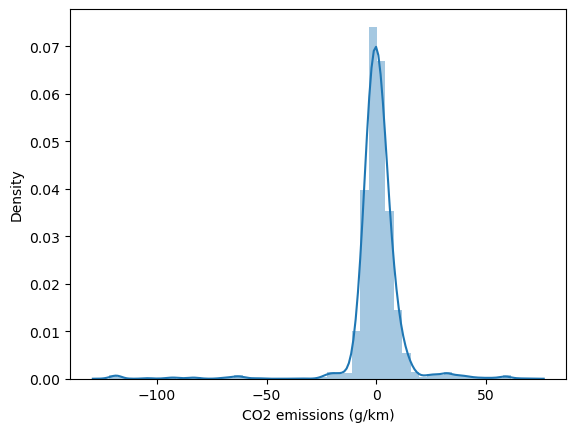

In [61]:
sns.distplot(Residual)
plt.show()

### Making Prediction on Test data

In [63]:
print(y_test.head())

5676    285
1677    251
2892    267
1880    235
3785    357
Name: CO2 emissions (g/km), dtype: int64


In [64]:
y_pred=regressor.predict(X_test)
print(y_pred[:5])

[280.27514137 245.97373337 269.2580058  235.61540176 350.69823217]


In [65]:
new_df_pred=pd.DataFrame({"Actual":y_test,"Predicted_value":y_pred})
new_df_pred.head()

,Actual,Predicted_value
5676,285,280.275141
1677,251,245.973733
2892,267,269.258006
1880,235,235.615402
3785,357,350.698232


Ferom above graph we see that the actual and predicted value of CO2 Emission is very similar... It means, the model gives good result.

## Model_Evaluation

In [67]:
from sklearn import metrics

print('R_Squared_val: ',metrics.r2_score(y_test,y_pred))

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R_Squared_val:  0.9526236225068313
Mean Absolute Error:  6.308311318824961
Root Mean Squared Error:  14.326275459055127


In [ ]:
# Residual Analysis on Test Data

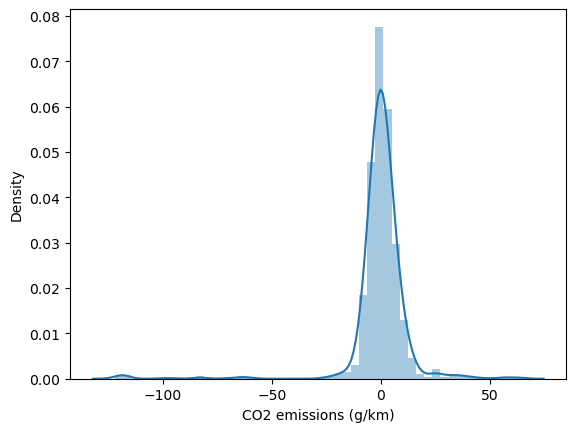

In [69]:
residual_on_test = y_test - y_pred

sns.distplot(residual_on_test)
plt.show()

### Coclusion:

We observe that the R-squared value is approximately 96%. This indicates that the regression model explains 96% of the variance in the target variable, which suggests that the model is well-fitting and likely to perform well on unseen data. Therefore, the model appears to be ready for deployment.

## Plot Output:

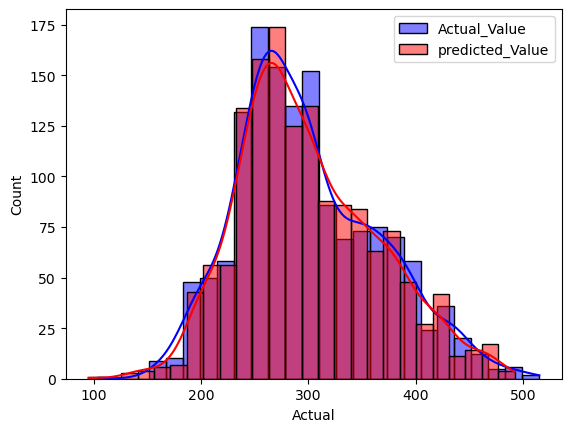

In [71]:
sns.histplot(new_df_pred['Actual'], kde=True,color='blue', label="Actual_Value")
sns.histplot(new_df_pred['Predicted_value'], kde=True,color='red', label="predicted_Value")
plt.legend()
plt.show()

From the graph above, we can observe that the actual and predicted CO2 emissions values closely align with each other. This indicates that the model is performing well and providing accurate predictions.